In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster 



In [2]:
# Importar archivo para trabajar
df_reviews = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Reviews_Completo.csv')

In [3]:
df_reviews

,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Comentario,Id_Estado,Nombre_Estado,Id_Franquicia
0,1,California Pizza Kitchen at Riverchase Galleria,33.381416,-86.807040,Pizza restaurant,4.1,18,sin comentario,1,Alabama,NaN
1,2,Pizza Hut,33.100547,-86.861968,"Pizza delivery, Chicken wings restaurant, Pizz...",3.2,78,sin comentario,1,Alabama,NaN
2,3,Cheetos,32.631013,-85.437473,"Asian fusion restaurant, Dessert restaurant",4.0,26,sin comentario,1,Alabama,NaN
3,4,Taco Bell,34.843859,-86.711656,"Fast food restaurant, Breakfast restaurant, Bu...",3.0,17,sin comentario,1,Alabama,NaN
4,5,Doris Jean's Country Kitchen,34.681722,-85.681300,American restaurant,4.1,48,sin comentario,1,Alabama,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103024,95055,MiSo,47.042392,-122.936001,"Asian fusion restaurant, Fast food restaurant,...",4.7,54,sin comentario,48,Washington,NaN
103025,95056,Glacier Peak Resort & Winery,48.512617,-121.469734,"Restaurant, ATM, Country food restaurant, Stea...",4.2,96,sin comentario,48,Washington,NaN
103026,95057,Newport Pizza,48.179205,-117.044331,"Pizza restaurant, Italian restaurant",4.1,108,sin comentario,48,Washington,NaN
103027,95058,Fatty Fish Sushi Restaurant,47.878470,-122.166333,Sushi restaurant,4.6,338,sin comentario,48,Washington,NaN


In [4]:
df_reviews.shape

(103029, 11)

In [5]:
df_reviews.duplicated().sum()

0

In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103029 entries, 0 to 103028
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id_Reviews         103029 non-null  int64  
 1   Nombre_Franquicia  103029 non-null  object 
 2   Latitud            103029 non-null  float64
 3   Longitud           103029 non-null  float64
 4   Categoria          103029 non-null  object 
 5   Promedio_Rating    103029 non-null  float64
 6   Cantidad_Reviews   103029 non-null  int64  
 7   Comentario         103029 non-null  object 
 8   Id_Estado          103029 non-null  int64  
 9   Nombre_Estado      103029 non-null  object 
 10  Id_Franquicia      15652 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.6+ MB


In [7]:
#proporciona una descripción rápida y útil de las estadísticas de la columna category	
df_reviews['Categoria'].describe()

count                                                103029
unique                                                19937
top       Sandwich shop, Caterer, Fast food restaurant, ...
freq                                                   6031
Name: Categoria, dtype: object

In [8]:
#proporciona una descripción rápida y útil de las estadísticas de la columna name
df_reviews['Nombre_Franquicia'].describe()

count     103029
unique     60547
top       Subway
freq        6813
Name: Nombre_Franquicia, dtype: object

In [9]:
#verificamos los valores unicos en la columna Estado

df_reviews['Nombre_Estado'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington'], dtype=object)

# ANALISIS EXPLORATORIO POR CATEGORIA

In [10]:
# Calcular la cantidad de veces que aparece cada categoría
category_counts = df_reviews['Categoria'].value_counts()

# Encontrar la categoría con la mayor cantidad
most_common_category = category_counts.idxmax()

# Filtrar el DataFrame original en función de la categoría con la mayor cantidad
most_common_category_df = df_reviews[df_reviews['Categoria'] == most_common_category]

# Mostrar el DataFrame resultante
most_common_category_df

,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Comentario,Id_Estado,Nombre_Estado,Id_Franquicia
9,10,Subway,33.421914,-86.675909,"Sandwich shop, Caterer, Fast food restaurant, ...",3.0,24,sin comentario,1,Alabama,1.0
34,35,Subway,30.703378,-88.125731,"Sandwich shop, Caterer, Fast food restaurant, ...",4.2,28,sin comentario,1,Alabama,1.0
35,36,Subway,33.495116,-86.807479,"Sandwich shop, Caterer, Fast food restaurant, ...",2.9,33,sin comentario,1,Alabama,1.0
57,58,Subway,33.343412,-86.437774,"Sandwich shop, Caterer, Fast food restaurant, ...",4.1,44,sin comentario,1,Alabama,1.0
62,63,Subway,33.333759,-86.917713,"Sandwich shop, Caterer, Fast food restaurant, ...",3.9,58,sin comentario,1,Alabama,1.0
...,...,...,...,...,...,...,...,...,...,...,...
102942,94973,Subway,47.320931,-122.587518,"Sandwich shop, Caterer, Fast food restaurant, ...",4.1,68,sin comentario,48,Washington,1.0
102954,94985,Subway,47.657983,-117.338405,"Sandwich shop, Caterer, Fast food restaurant, ...",3.4,38,sin comentario,48,Washington,1.0
102999,95030,Subway,47.324423,-122.220990,"Sandwich shop, Caterer, Fast food restaurant, ...",3.7,158,sin comentario,48,Washington,1.0
103007,95038,Subway,48.093246,-122.188274,"Sandwich shop, Caterer, Fast food restaurant, ...",3.6,76,sin comentario,48,Washington,1.0


In [11]:
unique_categories = df_reviews['Categoria'].unique()
unique_categories

array(['Pizza restaurant',
       'Pizza delivery, Chicken wings restaurant, Pizza restaurant, Pizza Takeout',
       'Asian fusion restaurant, Dessert restaurant', ...,
       'Restaurant, Hawaiian restaurant, Seafood restaurant, Sushi restaurant',
       'Asian fusion restaurant, Fast food restaurant, Health food restaurant',
       'Restaurant, ATM, Country food restaurant, Steak house, Winery'],
      dtype=object)

In [12]:
# Filtrar las categorías que no son 'Restaurant', 'Caterer' o '=Catering'
separated_df = df_reviews[(df_reviews['Categoria'] != 'Restaurant') & 
                            (df_reviews['Categoria'] != 'Caterer') &
                            (df_reviews['Categoria'] != '=Catering')]

# Mostrar el DataFrame resultante
separated_df


,Id_Reviews,Nombre_Franquicia,Latitud,Longitud,Categoria,Promedio_Rating,Cantidad_Reviews,Comentario,Id_Estado,Nombre_Estado,Id_Franquicia
0,1,California Pizza Kitchen at Riverchase Galleria,33.381416,-86.807040,Pizza restaurant,4.1,18,sin comentario,1,Alabama,NaN
1,2,Pizza Hut,33.100547,-86.861968,"Pizza delivery, Chicken wings restaurant, Pizz...",3.2,78,sin comentario,1,Alabama,NaN
2,3,Cheetos,32.631013,-85.437473,"Asian fusion restaurant, Dessert restaurant",4.0,26,sin comentario,1,Alabama,NaN
3,4,Taco Bell,34.843859,-86.711656,"Fast food restaurant, Breakfast restaurant, Bu...",3.0,17,sin comentario,1,Alabama,NaN
4,5,Doris Jean's Country Kitchen,34.681722,-85.681300,American restaurant,4.1,48,sin comentario,1,Alabama,NaN
...,...,...,...,...,...,...,...,...,...,...,...
103024,95055,MiSo,47.042392,-122.936001,"Asian fusion restaurant, Fast food restaurant,...",4.7,54,sin comentario,48,Washington,NaN
103025,95056,Glacier Peak Resort & Winery,48.512617,-121.469734,"Restaurant, ATM, Country food restaurant, Stea...",4.2,96,sin comentario,48,Washington,NaN
103026,95057,Newport Pizza,48.179205,-117.044331,"Pizza restaurant, Italian restaurant",4.1,108,sin comentario,48,Washington,NaN
103027,95058,Fatty Fish Sushi Restaurant,47.878470,-122.166333,Sushi restaurant,4.6,338,sin comentario,48,Washington,NaN


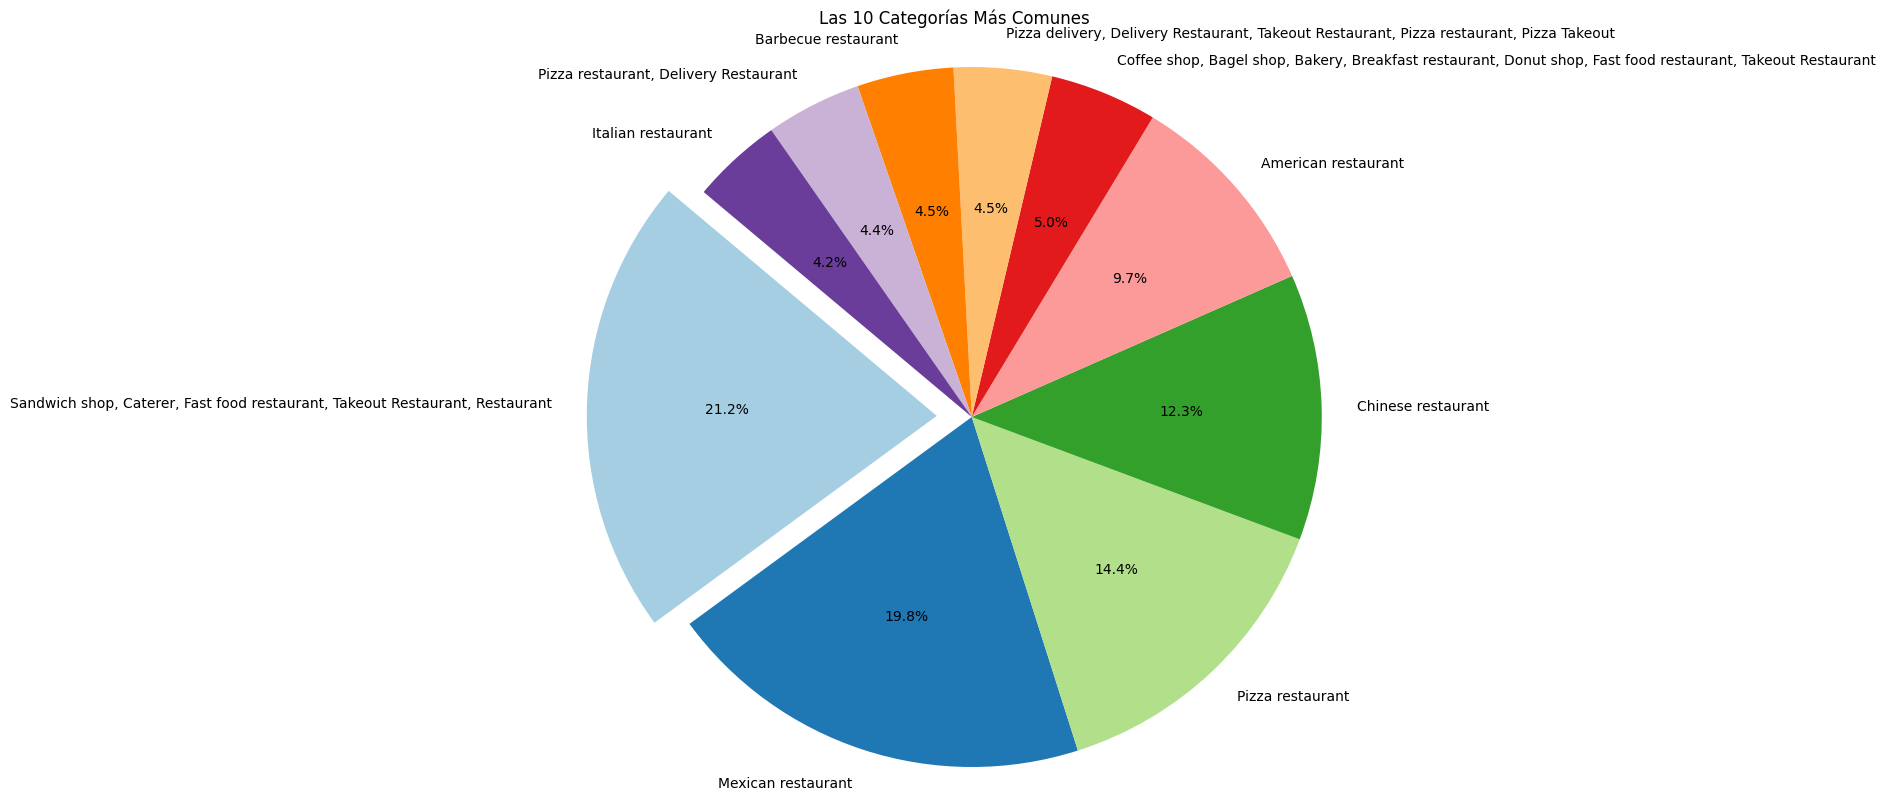

In [13]:
# Obtener la cuenta de cada categoría en el DataFrame filtrado
category_counts = separated_df['Categoria'].value_counts()

# Tomar las 10 categorías más comunes
top_10_categories = category_counts.head(10)

# Crear un gráfico de pastel mejorado con etiquetas, colores y sombreado
plt.figure(figsize=(10, 10))
colors = plt.cm.Paired(range(len(top_10_categories)))  
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Las 10 Categorías Más Comunes')
plt.axis('equal')
plt.show()


# Las 10 Categorías Más Comunes en Datos Filtrados

Este gráfico de pastel ofrece una representación visual de las categorías más predominantes en el DataFrame separated_df, después de haber aplicado un filtro específico para excluir ciertas categorías. El objetivo es identificar y destacar las 10 categorías que tienen una mayor presencia dentro del subconjunto de datos filtrado.

El gráfico de pastel se divide en 10 segmentos, cada uno etiquetado con el nombre de una categoría específica. Cada segmento se colorea de manera única y se acompaña de un porcentaje que indica la proporción que representa respecto al total de categorías en el DataFrame filtrado.

Los resultados de este análisis permiten visualizar claramente las categorías más destacadas en el subconjunto de datos filtrado. Esto puede proporcionar información valiosa sobre las áreas temáticas más relevantes o populares en el contexto de los datos filtrados.

Este tipo de visualización es especialmente útil cuando deseas comprender rápidamente qué categorías tienen mayor relevancia dentro de un conjunto de datos específico después de aplicar un filtro. Ayuda a identificar tendencias o enfoques predominantes en el conjunto de datos resultante.

En resumen, el gráfico de pastel presenta de manera efectiva las 10 categorías más comunes en los datos filtrados, lo que puede servir como punto de partida para análisis más detallados o decisiones basadas en datos dentro de ese subconjunto.

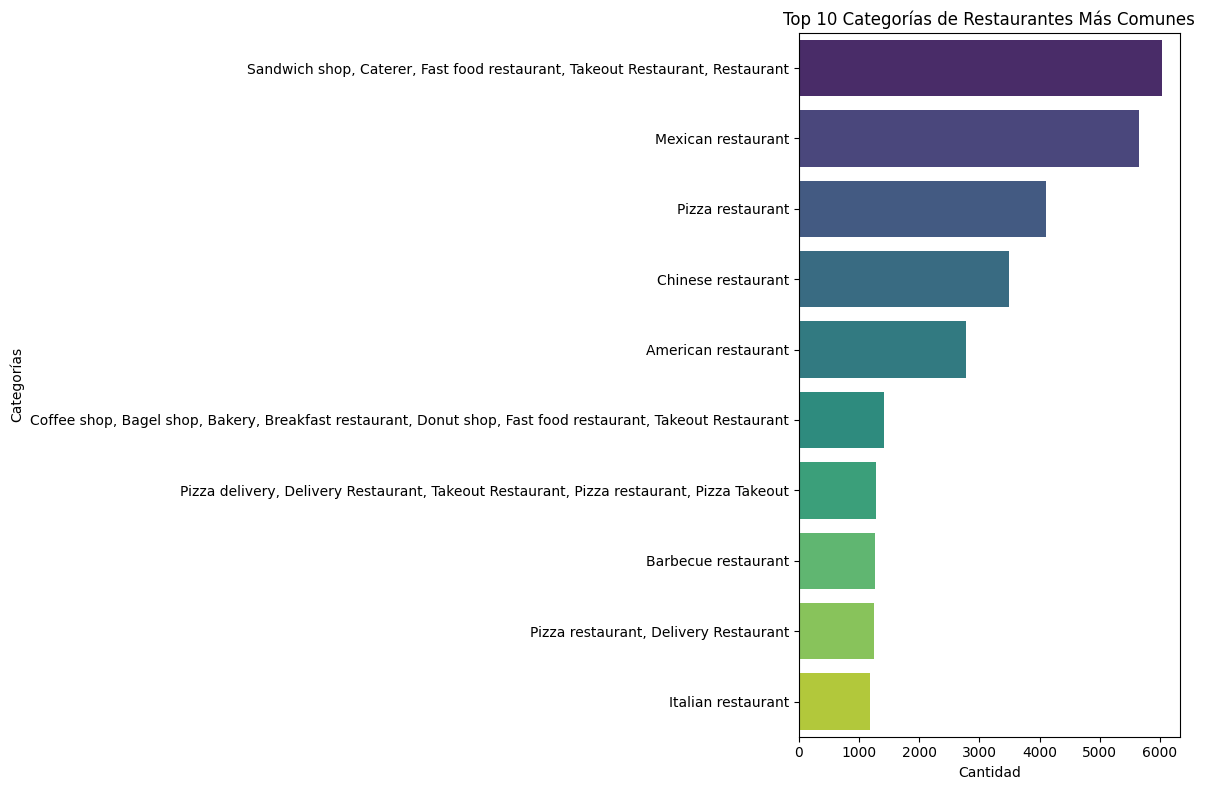

In [14]:

# Calcula el recuento de cada categoría
category_counts = separated_df['Categoria'].value_counts()

umbral = 10  

# Filtra las categorías extremas o atípicas
extreme_categories = category_counts[(category_counts < umbral) | (category_counts > umbral)]

# Ordena las categorías por cantidad descendente
extreme_categories = extreme_categories.sort_values(ascending=False)

# Selecciona las primeras 10 categorías extremas o atípicas
top_10_extreme_categories = extreme_categories.head(10)

# Crea un nuevo DataFrame con las primeras 10 categorías extremas o atípicas y su recuento
top_10_extreme_categories_df = pd.DataFrame({'Categoria': top_10_extreme_categories.index, 'Count': top_10_extreme_categories.values})

# Aumenta el tamaño de la figura
plt.figure(figsize=(12, 8))

# Utiliza un gráfico de barras horizontal apilado
sns.barplot(data=top_10_extreme_categories_df, y='Categoria', x='Count', palette='viridis')

plt.xlabel('Cantidad')
plt.ylabel('Categorías')
plt.title('Top 10 Categorías de Restaurantes Más Comunes')
plt.tight_layout()
plt.show()


# FRANQUICIAS EXITOSAS ESTADOS UNIDOS

In [15]:
# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = df_reviews['Nombre_Franquicia'].value_counts()

# Tomar las 20 franquicias más Exitosas
top_20_franquicias = restaurant_name_counts.head(20)

# Mostrar las franquicias
print("Las 20 franquicias más Exitosas:")
for franquicia in top_20_franquicias.index:
    print(franquicia)


Las 20 franquicias más Exitosas:
Subway
Dunkin'
Domino's Pizza
Pizza Hut
Acme Oyster House
Papa John's Pizza
McDonald's
Starbucks
Little Caesars Pizza
Jimmy John's
Burger King
Taco Bell
Chick-fil-A
QuikTrip
Wendy's
Chipotle Mexican Grill
KFC
Smoothie King
Wawa
Dunkin


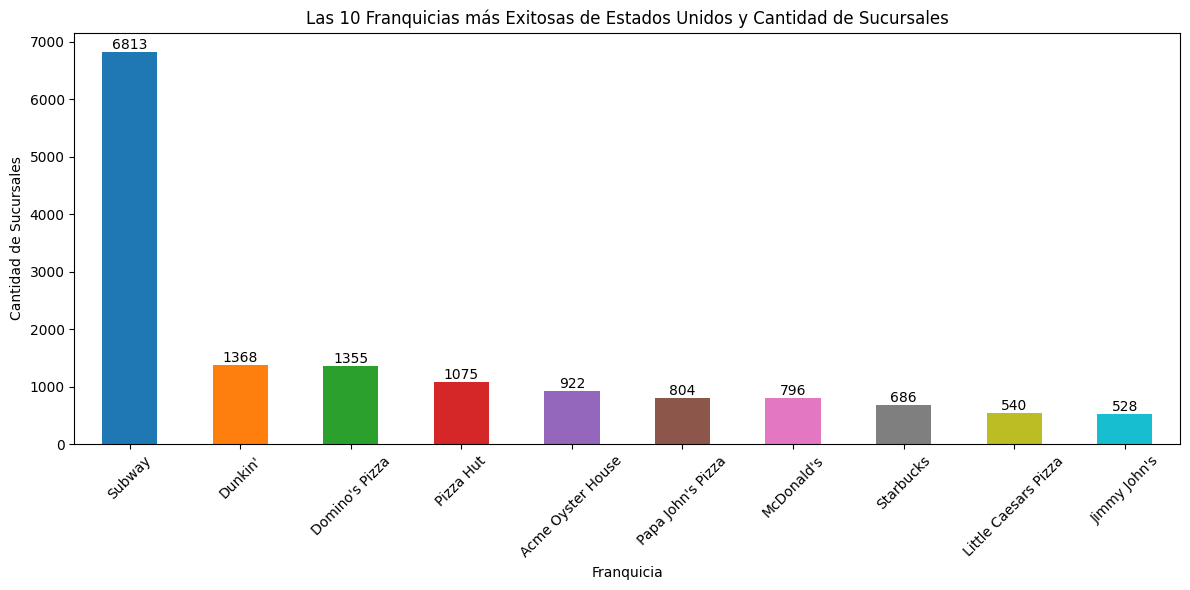

In [16]:
# Calcular la frecuencia de cada nombre de restaurante
restaurant_name_counts = df_reviews['Nombre_Franquicia'].value_counts()

# Filtrar los nombres que aparecen más de una vez (posibles franquicias)
franquicias = restaurant_name_counts[restaurant_name_counts > 1]

# Limitar a las 10 franquicias más exitosas
top_10_franquicias = franquicias.head(10)

colores = plt.cm.tab10(range(len(top_10_franquicias)))

# Crear la gráfica de barras con colores distintos
plt.figure(figsize=(12, 6))
top_10_franquicias.plot(kind='bar', color=colores)
plt.xlabel('Franquicia')
plt.ylabel('Cantidad de Sucursales')
plt.title('Las 10 Franquicias más Exitosas de Estados Unidos y Cantidad de Sucursales')
plt.xticks(rotation=45)

# Agregar etiquetas con el número exacto de sucursales en las barras
for i, v in enumerate(top_10_franquicias):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# Las 10 Franquicias mas exitosas de Estados Unidos y cantidad de Sucursales

Este gráfico de barras presenta las 10 franquicias de restaurantes más comunes en estados densamente poblados de los Estados Unidos, basándose en la frecuencia de aparición en el conjunto de datos y el número exacto de sucursales en cada una de ellas. Estas franquicias representan una variedad de opciones culinarias y son reconocidas por su presencia extendida en áreas urbanas y metropolitanas.

1. Subway (6813 Sucursales): Subway es una cadena de restaurantes de comida rápida famosa por sus submarinos o sándwiches sub. Se destaca por ofrecer opciones de comida rápida más saludables y es una de las franquicias más extendidas a nivel mundial.

2. Dunkin' (1368 Sucursales): Dunkin' es conocida por sus donas, café y otros productos de panadería. Es un lugar popular para el desayuno y el café.

3. Domino's Pizza (1355 Sucursales): Domino's Pizza es una franquicia de pizza conocida por su entrega rápida y su variedad de opciones de pizza.

4. Pizza Hut (1075 Sucursales): Pizza Hut es una franquicia de pizza conocida por sus pizzas variadas y sus opciones de entrega a domicilio. Ofrece una amplia gama de pizzas y otros acompañamientos.

5. Acme Oyster House( 922 Sucursales):  Esta cadena de restaurantes es conocida por servir mariscos y platos cajún en un ambiente relajado y acogedor. Ofrece una variedad de deliciosos platillos, incluyendo ostras a la parrilla, gumbo, po'boys y otros platos tradicionales de la cocina sureña de Estados Unidos. Con su amplia presencia a lo largo de múltiples ubicaciones, Acme Oyster House es una opción popular para los amantes de la comida de mar y la cocina cajún.

6. Papa John's Pizza (804 Sucursales): Papa John's Pizza es otra franquicia de pizza que ofrece una amplia variedad de pizzas y productos relacionados.

7. McDonald's (796 Sucursales): McDonald's es una de las cadenas de comida rápida más icónicas y reconocibles en todo el mundo. Ofrece una amplia variedad de hamburguesas, papas fritas y otros productos.

8. Starbucks (686 Sucursales): Starbucks es conocida por su café de alta calidad y una variedad de bebidas. Es un lugar popular para los amantes del café.

9. Little Caesars Pizza (540 Sucursales): Little Caesars es una franquicia de pizza conocida por su eslogan "Pizza Pizza" y su enfoque en ofrecer pizza de calidad a precios asequibles.

10. Jimmy John's (528 Sucursales): Jimmy John's es una cadena de restaurantes de comida rápida que se especializa en sándwiches.

Esta lista proporciona una visión completa de las franquicias de Estados Unidos, destacando su presencia y alcance en función del número de sucursales. Estos datos son valiosos para  comprender la diversidad de opciones culinarias  y evaluar las oportunidades de inversión o expansión en la industria.

# ANALISIS DE LA FRANQUICIA SUBWAY

In [17]:
# Filtrar el DataFrame df_reviews para obtener solo las filas de Subway
subway_locations = df_reviews[df_reviews['Nombre_Franquicia'] == 'Subway']

# Seleccionar solo las columnas de Latitud y Longitud
subway_locations = subway_locations[['Latitud', 'Longitud']]

# Mostrar el nuevo DataFrame con las ubicaciones de Subway
print("Ubicaciones de todas las sucursales de Subway:")
print(subway_locations)




Ubicaciones de todas las sucursales de Subway:
          Latitud    Longitud
9       33.421914  -86.675909
34      30.703378  -88.125731
35      33.495116  -86.807479
57      33.343412  -86.437774
62      33.333759  -86.917713
...           ...         ...
102942  47.320931 -122.587518
102954  47.657983 -117.338405
102999  47.324423 -122.220990
103007  48.093246 -122.188274
103008  48.223620 -122.474407

[6813 rows x 2 columns]


Esto indica que en esa ubicación particular (representada por esas coordenadas de latitud y longitud), se encuentran 108 sucursales de Subway, lo que la convierte en la ubicación con la mayor cantidad de sucursales en tu conjunto de datos. Esta información puede ser útil para comprender dónde se concentran más las sucursales de Subway en tu área o región de interés.

In [18]:
subway_locations

,Latitud,Longitud
9,33.421914,-86.675909
34,30.703378,-88.125731
35,33.495116,-86.807479
57,33.343412,-86.437774
62,33.333759,-86.917713
...,...,...
102942,47.320931,-122.587518
102954,47.657983,-117.338405
102999,47.324423,-122.220990
103007,48.093246,-122.188274


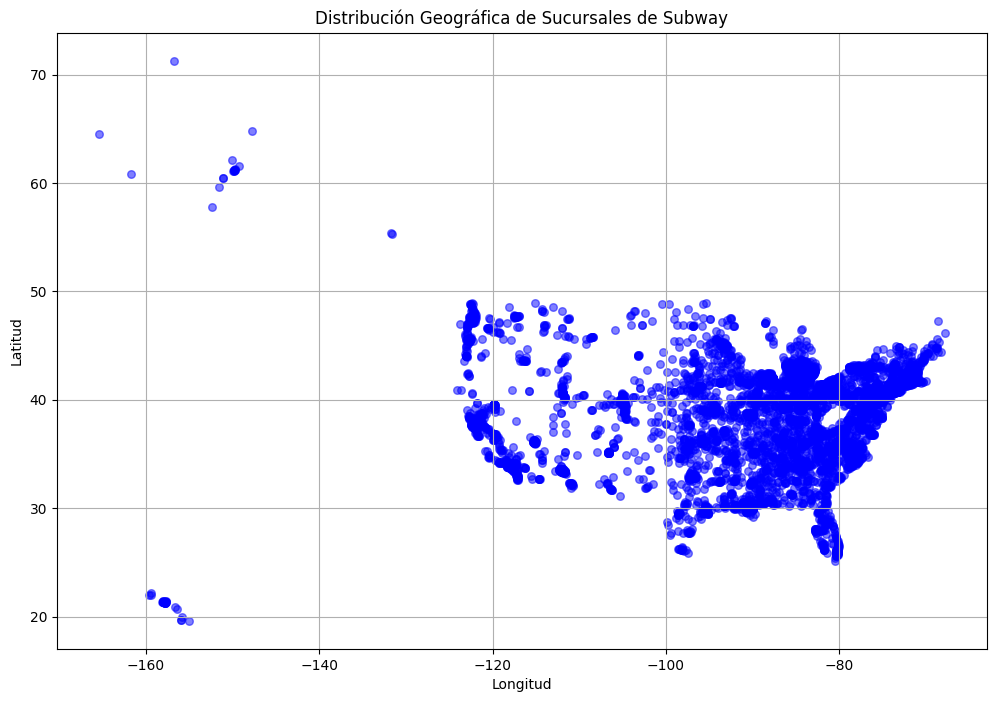

In [19]:

# Datos de latitud y longitud de las sucursales de Subway
latitudes = subway_locations['Latitud']
longitudes = subway_locations['Longitud']

size = 30

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, s=size, alpha=0.5, c='blue', label='Sucursales de Subway')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de Sucursales de Subway')
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Distribución Geográfica de Sucursales de Subway

Este mapa interactivo presenta la distribución geográfica de las sucursales de Subway en función de las coordenadas de latitud y longitud. Cada punto en el mapa representa una ubicación específica donde se encuentra una sucursal de Subway. La densidad de puntos en el mapa refleja la concentración de sucursales en diferentes áreas geográficas.

Esta distribución geográfica de las sucursales de Subway puede ofrecernos información sobre la estrategia y el rendimiento de esta franquicia de comida rápida. Al observar la ubicación de las sucursales en un mapa, podemos obtener una visión más clara de cómo Subway ha expandido su presencia y cuáles son las áreas clave de enfoque.

1. Densidad de Sucursales:
Observamos que hay áreas donde las sucursales de Subway están más densamente concentradas y ello nos puede revelar ubicaciones urbanas o comerciales con una alta demanda de comida rápida. Esto podría indicar la popularidad de Subway en entornos específicos.

2. Expansión Regional:
Comparando la presencia de Subway en diferentes regiones geográficas podemos entender su estrategia de expansión. ¿Dónde tiene Subway una presencia más fuerte y en qué regiones está menos presente?

3. Ubicaciones Estratégicas:
Identificamos si Subway elige ubicaciones estratégicas, como cerca de estaciones de tren, universidades o áreas turísticas, este mapa puede proporcionarnos información sobre su enfoque en la accesibilidad y el mercado objetivo.

4. Espacios Vacíos:
Identificamos áreas donde no existen sucursales de Subway , y ello nos ayudar a evaluar oportunidades de mercado no explotadas. ¿Existen áreas que podrían ser candidatas para una futura expansión?

5. Competencia:
Comparando la ubicación de las sucursales de Subway con las de otras franquicias de comida rápida puede arrojar luz sobre la competencia en diferentes áreas y la estrategia competitiva de Subway.

6. Accesibilidad:
Analizando si las ubicaciones de las sucursales están cerca de carreteras principales o áreas de alto tráfico puede llevarnos a indicar un enfoque en la accesibilidad para los clientes.



Esta distribución geográfica de las sucursales de Subway es un aspecto importante de nuestra estrategia de negocio.



# Analisis Exploratorio de Promedio_Rating:



In [89]:
# Selecciona las columnas de interés
df_rating = df_reviews[['Promedio_Rating', 'Cantidad_Reviews', 'Nombre_Franquicia', 'Categoria', 'Nombre_Estado']]

# Muestra las primeras filas del nuevo DataFrame
print(df_rating.head())


   Promedio_Rating  Cantidad_Reviews  \
0              4.1                18   
1              3.2                78   
2              4.0                26   
3              3.0                17   
4              4.1                48   

                                 Nombre_Franquicia  \
0  California Pizza Kitchen at Riverchase Galleria   
1                                        Pizza Hut   
2                                          Cheetos   
3                                        Taco Bell   
4                     Doris Jean's Country Kitchen   

                                           Categoria Nombre_Estado  
0                                   Pizza restaurant       Alabama  
1  Pizza delivery, Chicken wings restaurant, Pizz...       Alabama  
2        Asian fusion restaurant, Dessert restaurant       Alabama  
3  Fast food restaurant, Breakfast restaurant, Bu...       Alabama  
4                                American restaurant       Alabama  


In [90]:
df_rating

,Promedio_Rating,Cantidad_Reviews,Nombre_Franquicia,Categoria,Nombre_Estado
0,4.1,18,California Pizza Kitchen at Riverchase Galleria,Pizza restaurant,Alabama
1,3.2,78,Pizza Hut,"Pizza delivery, Chicken wings restaurant, Pizz...",Alabama
2,4.0,26,Cheetos,"Asian fusion restaurant, Dessert restaurant",Alabama
3,3.0,17,Taco Bell,"Fast food restaurant, Breakfast restaurant, Bu...",Alabama
4,4.1,48,Doris Jean's Country Kitchen,American restaurant,Alabama
...,...,...,...,...,...
103024,4.7,54,MiSo,"Asian fusion restaurant, Fast food restaurant,...",Washington
103025,4.2,96,Glacier Peak Resort & Winery,"Restaurant, ATM, Country food restaurant, Stea...",Washington
103026,4.1,108,Newport Pizza,"Pizza restaurant, Italian restaurant",Washington
103027,4.6,338,Fatty Fish Sushi Restaurant,Sushi restaurant,Washington


In [91]:
# Calcula estadísticas descriptivas para Promedio_Rating y Cantidad_Reviews
descripcion_estadistica = df_rating[['Promedio_Rating', 'Cantidad_Reviews']].describe()

# Muestra las estadísticas descriptivas
print(descripcion_estadistica)


       Promedio_Rating  Cantidad_Reviews
count    103029.000000     103029.000000
mean          4.141017        260.129362
std           0.473127        814.163067
min           1.300000          5.000000
25%           3.900000         38.000000
50%           4.200000         74.000000
75%           4.500000        147.000000
max           5.000000       9998.000000


Las estadísticas descriptivas indican que, en promedio, los restaurantes en el conjunto de datos tienen una calificación promedio de alrededor de 4.14, con una desviación estándar de aproximadamente 0.47, lo que sugiere cierta variabilidad en las calificaciones. La cantidad promedio de revisiones por restaurante es de aproximadamente 260.13, con una desviación estándar de alrededor de 814.16. La calificación promedio más baja es 1.3, mientras que la más alta es 5.0. La cantidad de revisiones varía ampliamente, desde un mínimo de 5 hasta un máximo de 9998 revisiones. Los percentiles 25, 50 y 75 para calificaciones promedio son 3.9, 4.2 y 4.5, respectivamente, mientras que los percentiles para cantidad de revisiones son 38, 74 y 147, lo que proporciona una visión de la distribución de estos valores en el conjunto de datos.

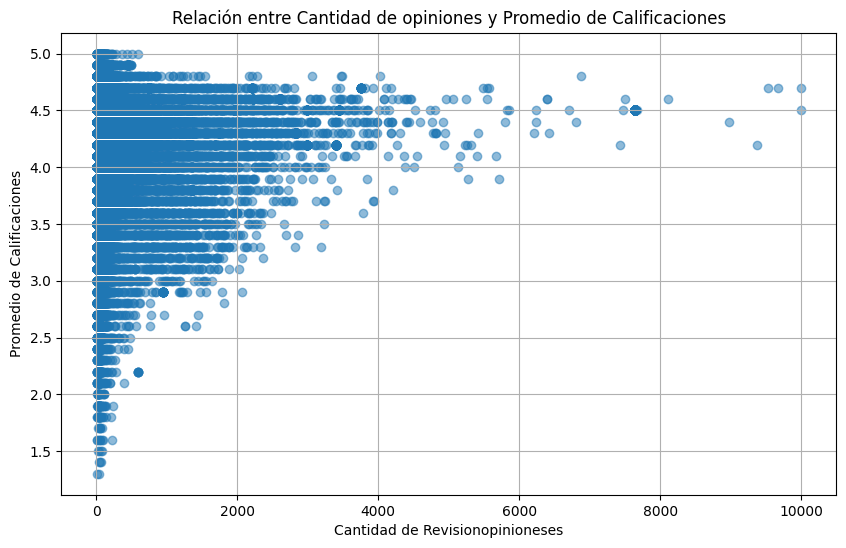

In [92]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_rating['Cantidad_Reviews'], df_rating['Promedio_Rating'], alpha=0.5)
plt.xlabel('Cantidad de Revisionopinioneses')
plt.ylabel('Promedio de Calificaciones')
plt.title('Relación entre Cantidad de opiniones y Promedio de Calificaciones')
plt.grid(True)

# Mostrar el gráfico
plt.show()


### Este gráfico de dispersión muestra una relación interesante entre la cantidad de opiniones y el promedio de calificaciones de los restaurantes en el conjunto de datos. A medida que la cantidad de opiniones aumenta, parece haber una tendencia a que el promedio de calificaciones tienda a estabilizarse alrededor de un valor promedio, aproximadamente entre 3.5 y 4.5. Esto sugiere que los restaurantes con pocas opiniones pueden tener una variación más amplia en las calificaciones, mientras que aquellos con un mayor número de opiniones tienden a mantener calificaciones más consistentes. Sin embargo, también se observan excepciones, lo que indica que otros factores pueden influir en el promedio de calificaciones.

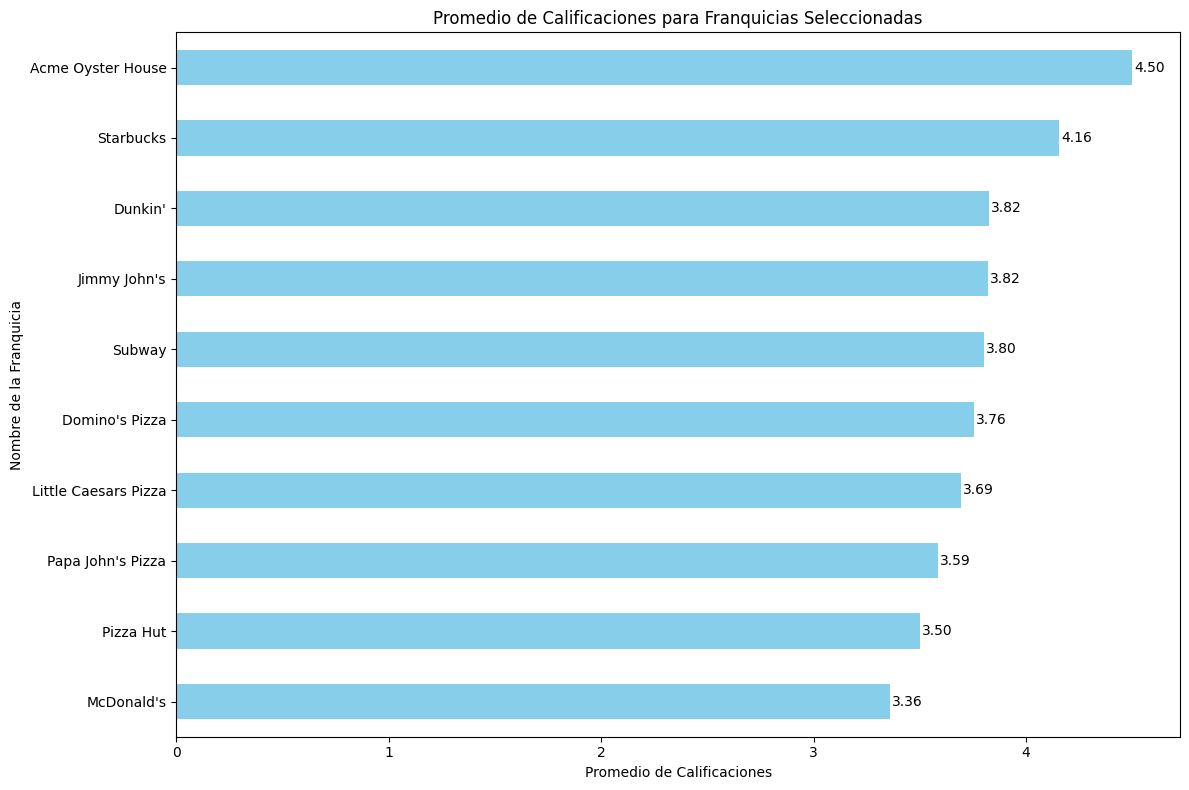

In [93]:
# Lista de las franquicias seleccionadas
franquicias_seleccionadas = ['Subway', 'Dunkin\'', 'Domino\'s Pizza', 'Pizza Hut', 'Acme Oyster House', 
                            'Papa John\'s Pizza', 'McDonald\'s', 'Starbucks', 'Little Caesars Pizza', 
                            'Jimmy John\'s']

# Filtrar df_reviews para incluir solo las franquicias seleccionadas
df_reviews_seleccionadas = df_reviews[df_reviews['Nombre_Franquicia'].isin(franquicias_seleccionadas)]

# Filtrar df_rating para incluir solo las franquicias seleccionadas y calcular el promedio de calificaciones
promedio_por_franquicia = df_rating[df_rating['Nombre_Franquicia'].isin(franquicias_seleccionadas)].groupby('Nombre_Franquicia')['Promedio_Rating'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
promedio_por_franquicia.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Promedio de Calificaciones')
plt.ylabel('Nombre de la Franquicia')
plt.title('Promedio de Calificaciones para Franquicias Seleccionadas')

# Mostrar el gráfico con etiquetas giradas para una mejor legibilidad
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la franquicia con la mejor calificación en la parte superior
plt.xticks(rotation=0)  # No rotar las etiquetas del eje x

# Agregar las calificaciones exactas encima de las barras
for i, rating in enumerate(promedio_por_franquicia.sort_values(ascending=False)):
    plt.text(rating + 0.01, i, f'{rating:.2f}', va='center', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### El análisis de las franquicias seleccionadas y sus promedios de calificaciones revela información valiosa sobre cómo estas cadenas de restaurantes son percibidas por los clientes. 

Entre las franquicias consideradas, Acme Oyster House se destaca como la de mejor calificación promedio, lo que sugiere que ofrece una experiencia culinaria altamente satisfactoria para sus clientes. La presencia de Starbucks en el segundo lugar en términos de calificaciones promedio también es notable, lo que indica una recepción positiva por parte de los amantes del café y otros productos que ofrece esta cadena.

Por otro lado, las franquicias Dunkin' y Little Caesars Pizza tienen los promedios de calificaciones más bajos entre las seleccionadas, lo que podría indicar áreas donde podrían mejorar la satisfacción del cliente o la calidad del servicio. Estos datos pueden ser útiles tanto para los propietarios de las franquicias como para la corporación matriz, ya que proporcionan una perspectiva sobre la satisfacción del cliente y áreas potenciales de enfoque para la mejora continua.

En general, este análisis resalta la importancia de la retroalimentación de los clientes y cómo puede influir en la percepción de una franquicia en el mercado. Para las franquicias de alimentos y bebidas, la calidad de la comida, el servicio al cliente y la consistencia son factores clave que pueden influir en las calificaciones y, en última instancia, en el éxito de la franquicia. Estos hallazgos pueden servir como punto de partida para estrategias de mejora y satisfacción del cliente en el futuro

In [94]:
# Filtrar df_rating para incluir solo la categoría "Fast food restaurant" y calcular el promedio de calificaciones
promedio_fast_food = df_rating[df_rating['Categoria'] == 'Fast food restaurant']['Promedio_Rating'].mean()

# Mostrar el promedio de calificaciones para la categoría "Fast food restaurant"
print(f"El promedio de calificaciones para la categoría 'Fast food restaurant' es: {promedio_fast_food:.2f}")


El promedio de calificaciones para la categoría 'Fast food restaurant' es: 4.05


/var/folders/9h/wktndydj5rg6pj7yfx6ws1gm0000gn/T/ipykernel_76180/1525121588.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_fast_food = top_fast_food.append({'Nombre_Franquicia': 'Subway', 'Promedio_Rating': subway_rating}, ignore_index=True)


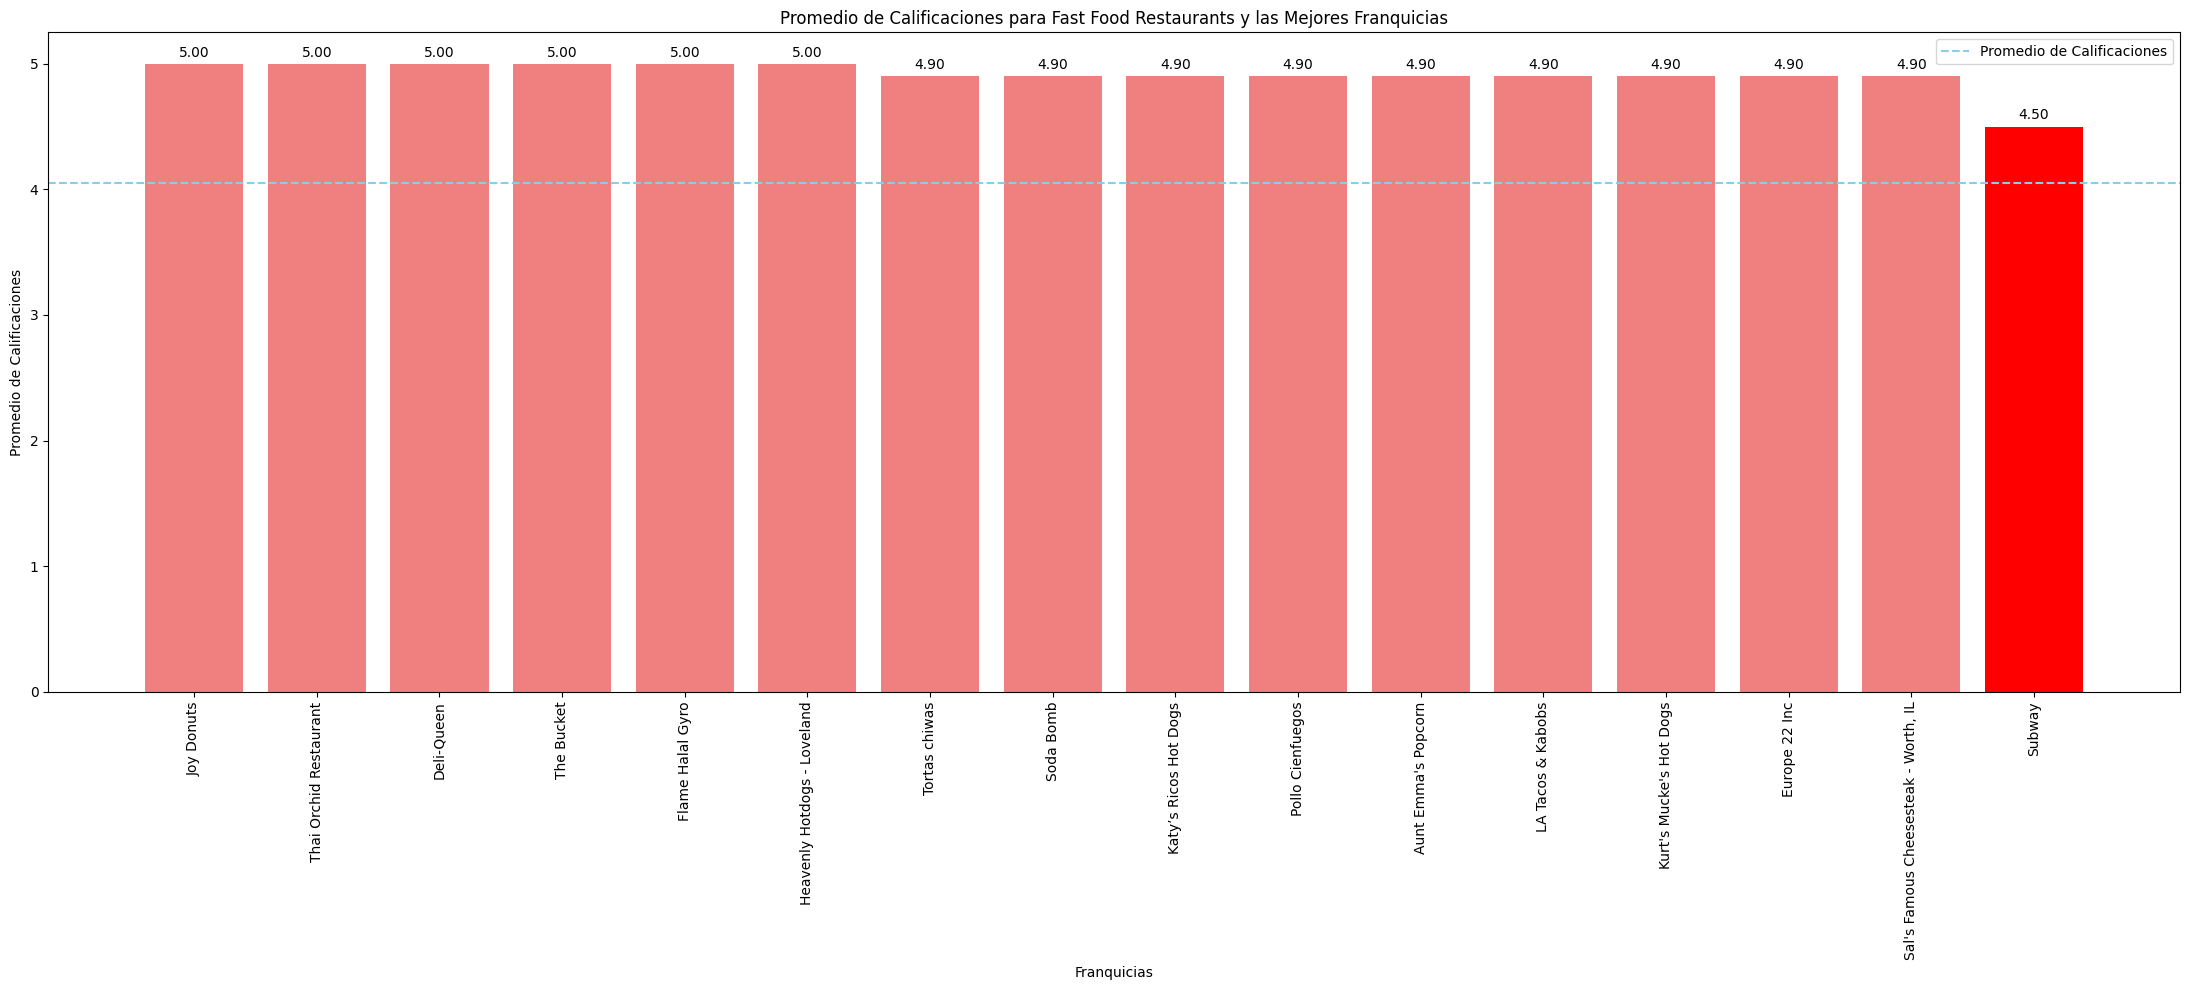

In [95]:


# Filtrar df_rating para incluir solo la categoría "Fast food restaurant" y calcular el promedio de calificaciones
promedio_fast_food = df_rating[df_rating['Categoria'] == 'Fast food restaurant']['Promedio_Rating'].mean()

# Filtrar las franquicias mejor calificadas en la categoría "Fast food restaurant"
top_fast_food = df_rating[df_rating['Categoria'] == 'Fast food restaurant'].nlargest(15, 'Promedio_Rating')

# Verificar si Subway está en las franquicias mejor calificadas
subway_included = 'Subway' in top_fast_food['Nombre_Franquicia'].values

# Si Subway no está en las franquicias mejor calificadas, agregarlo con un promedio de calificación por debajo del promedio de la categoría
if not subway_included:
    subway_rating = df_rating[(df_rating['Nombre_Franquicia'] == 'Subway') & (df_rating['Categoria'] == 'Fast food restaurant')]['Promedio_Rating'].mean()
    top_fast_food = top_fast_food.append({'Nombre_Franquicia': 'Subway', 'Promedio_Rating': subway_rating}, ignore_index=True)

# Ordenar las franquicias por calificación
top_fast_food = top_fast_food.sort_values(by='Promedio_Rating', ascending=False)

colors = ['red' if franquicia == 'Subway' else 'lightcoral' for franquicia in top_fast_food['Nombre_Franquicia']]

# Crear el gráfico de barras
plt.figure(figsize=(22, 10))

# Barras para las franquicias mejor calificadas
bars = plt.bar(top_fast_food['Nombre_Franquicia'], top_fast_food['Promedio_Rating'], color=colors)

# Barra para el promedio de calificaciones de la categoría "Fast food restaurant"
plt.axhline(y=promedio_fast_food, color='skyblue', linestyle='--', label='Promedio de Calificaciones')

plt.xlabel('Franquicias')
plt.ylabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones para Fast Food Restaurants y las Mejores Franquicias')
plt.xticks(rotation=90)
plt.legend()

# Agregar los valores del promedio de calificaciones en cada barra
for bar, rating in zip(bars, top_fast_food['Promedio_Rating']):
    plt.annotate(f'{rating:.2f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3),  
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




### Este gráfico de barras ofrece una perspectiva interesante sobre las calificaciones de las franquicias de la categoría "Fast food restaurant" y resalta un hecho notable: 

A pesar de que Subway es una de las franquicias más extendidas en Estados Unidos, apenas logra superar el promedio de calificaciones en esta categoría. Esto refleja que, aunque Subway tiene una amplia presencia, su percepción por parte de los clientes se encuentra en línea con la calificación promedio otorgada a otras franquicias de comida rápida. Este hallazgo podría indicar que, a pesar de su popularidad y tamaño, Subway tiene margen de mejora en términos de satisfacción del cliente para elevar sus calificaciones.

Observamos que en el gráfico existen franquicias que sobresalen significativamente en términos de calificaciones, situándose muy por encima del promedio de la categoría. Estas franquicias destacadas pueden estar ofreciendo una experiencia excepcional a sus clientes, lo que se refleja en las altas calificaciones que reciben. En contraste, algunas otras franquicias tienen calificaciones por debajo del promedio, lo que podría indicar desafíos en la satisfacción del cliente o áreas donde podrían implementar mejoras.

Este gráfico nos brinda una visión completa de cómo se califican las franquicias de comida rápida en la categoría "Fast food restaurant", y subraya que, a pesar de su extensa presencia, Subway se encuentra en línea con el promedio, mientras que otras franquicias logran destacar por su excepcional satisfacción del cliente. Este análisis puede servir como una guía para que las franquicias identifiquen áreas de mejora y mantengan o superen las expectativas de los consumidores.

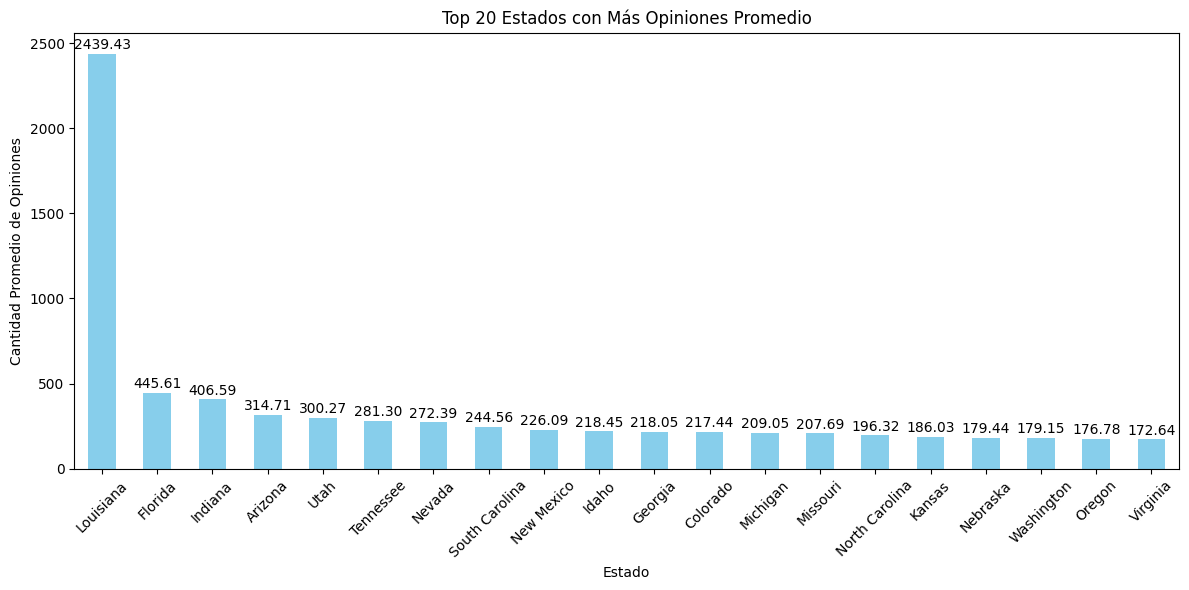

In [96]:

# Calcular la cantidad promedio de revisiones por estado
promedio_reviews_por_estado = df_reviews.groupby('Nombre_Estado')['Cantidad_Reviews'].mean()

# Seleccionar los 20 estados con más revisiones
top_20_estados = promedio_reviews_por_estado.nlargest(20)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_20_estados.plot(kind='bar', color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Cantidad Promedio de Opiniones')
plt.title('Top 20 Estados con Más Opiniones Promedio')

# Agregar etiquetas a las barras y mostrar el gráfico
for i, cantidad in enumerate(top_20_estados):
    plt.text(i, cantidad + 10, f'{cantidad:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


### El resultado de este gráfico de barras, que muestra los 20 estados con la cantidad promedio de opiniones más alta, es ser de gran utilidad en un Análisis Exploratorio de Datos (EDA). Esta visualización nos permite identificar tendencias geográficas en la plataforma, revelando si ciertas regiones o estados generan más opiniones en promedio. Esta información es valiosa para enfocarnos estrategias de marketing de manera efectiva, comprender la demanda y preferencias de usuarios en diferentes ubicaciones geográficas, y tomar decisiones empresariales informadas. Por ejemplo, en el caso de nuetro cliente antes la evaluacion de una oportunidad de negocio, este análisis ayudaría a identificar dónde tener mas presencia en plataformas de opiniones y gestionar las opiniones de clientes de manera estratégica. Para concluir, este gráfico nos proporciona información clave para la toma de decisiones y estrategias empresariales, enfocándonos en la cantidad promedio de opiniones en diferentes estados.